<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/Forecasting_(Model_based_methods).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forecasting : Model based methods**

In [41]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
Walmart["Date"] = pd.to_datetime(Walmart.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column
# using Date functions from pandas.

Walmart["month"] = Walmart.Date.dt.strftime("%b")  # month extraction
Walmart["year"] = Walmart.Date.dt.strftime("%Y")  # year extraction

#Walmart["Day"] = Walmart.Date.dt.strftime("%d")   # Day extraction
#Walmart["wkday"] = Walmart.Date.dt.strftime("%A")  # weekday extraction

In [44]:
Walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991


<Axes: xlabel='month', ylabel='year'>

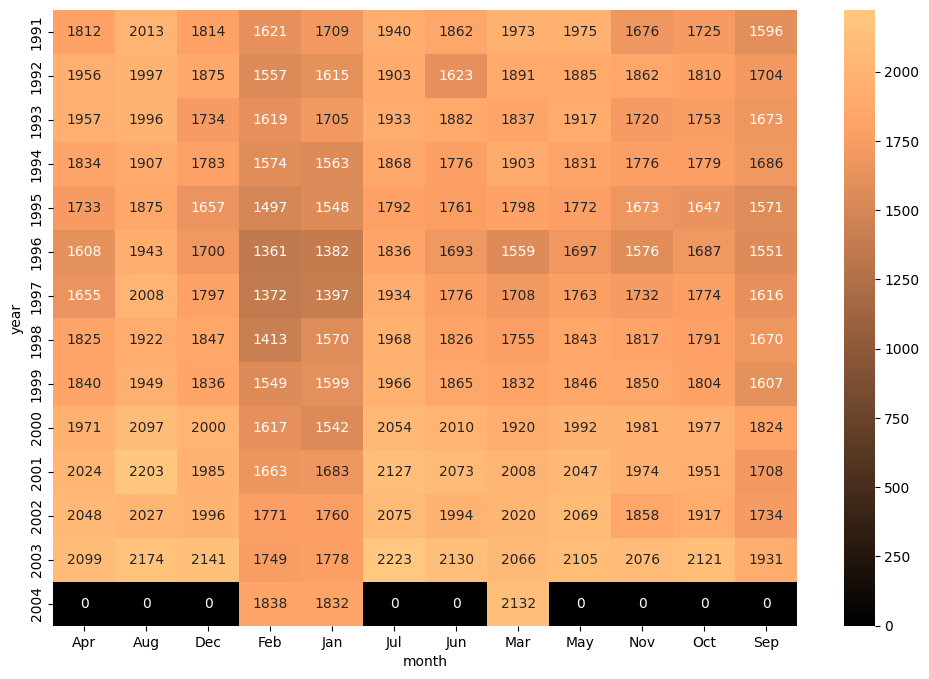

In [45]:
#heatmap
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Walmart,values="Footfalls",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g",cmap='copper')  #(fmt is format of the grid values)

<Axes: xlabel='year', ylabel='Footfalls'>

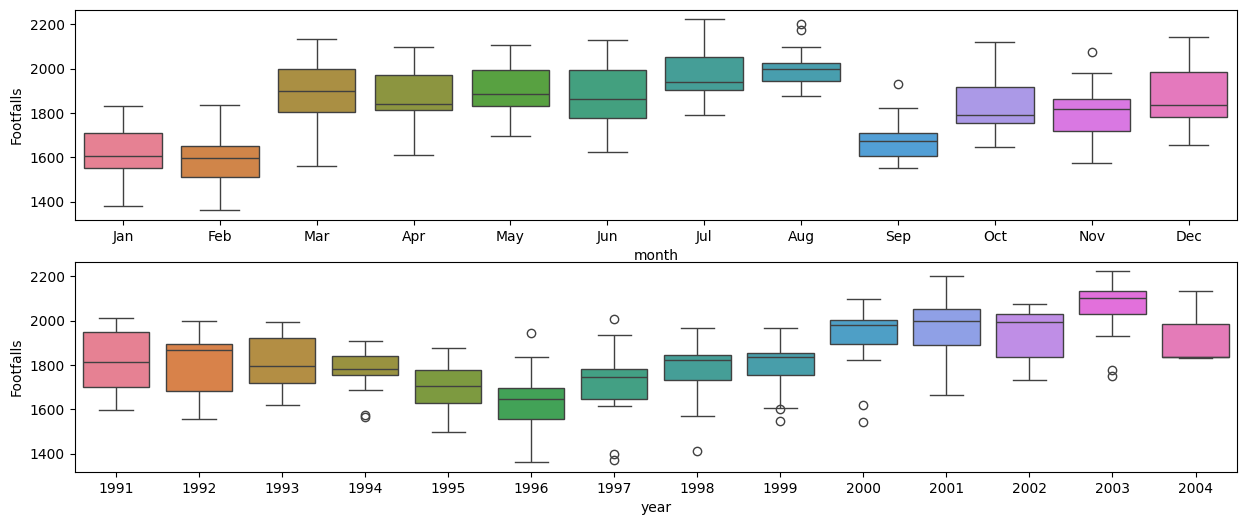

In [46]:
# Boxplot

plt.figure(figsize=(15,6))
plt.subplot(211)
sns.boxplot(x="month",y="Footfalls",data=Walmart,hue='month')
plt.subplot(212)
sns.boxplot(x="year",y="Footfalls",data=Walmart,hue='year')


<Axes: xlabel='year', ylabel='Footfalls'>

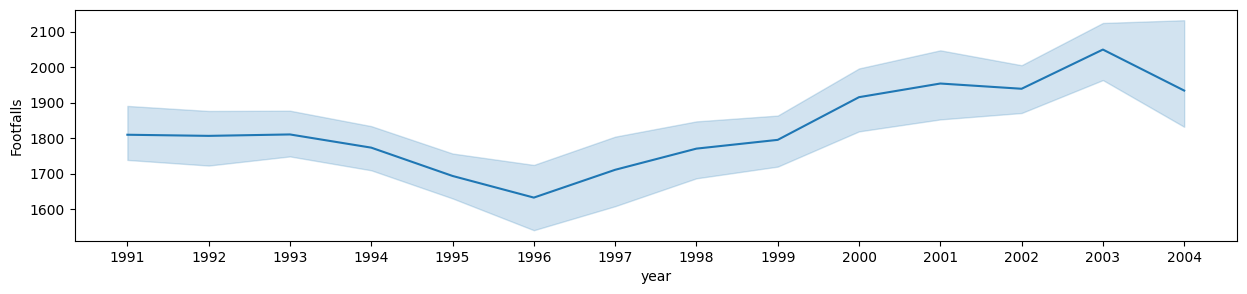

In [47]:
#lineplot

plt.figure(figsize=(15,3))
sns.lineplot(x="year",y="Footfalls",data=Walmart)

In [48]:
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,2004
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,Feb,2004


# Splitting data

In [49]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

In [50]:
Test

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
147,Apr-03,2099,148,7.649216,21904,0,0,0,1,0,0,0,0,0,0,0,0,2003-04-01,Apr,2003
148,May-03,2105,149,7.652071,22201,0,0,0,0,1,0,0,0,0,0,0,0,2003-05-01,May,2003
149,Jun-03,2130,150,7.663877,22500,0,0,0,0,0,1,0,0,0,0,0,0,2003-06-01,Jun,2003
150,Jul-03,2223,151,7.706613,22801,0,0,0,0,0,0,1,0,0,0,0,0,2003-07-01,Jul,2003
151,Aug-03,2174,152,7.684324,23104,0,0,0,0,0,0,0,1,0,0,0,0,2003-08-01,Aug,2003
152,Sep-03,1931,153,7.565793,23409,0,0,0,0,0,0,0,0,1,0,0,0,2003-09-01,Sep,2003
153,Oct-03,2121,154,7.659643,23716,0,0,0,0,0,0,0,0,0,1,0,0,2003-10-01,Oct,2003
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,2004


In [51]:
#Linear Model

import statsmodels.formula.api as smf

linear_model = smf.ols('Footfalls~t',data=Train).fit()
pred = linear_model.predict(Test["t"])

rmse_linear = np.sqrt(np.mean((np.array(Test["Footfalls"])-np.array(pred))**2))
print(rmse_linear)


209.92559265462572


In [52]:
#Exponential model

Exp = smf.ols('log_footfalls~t',data=Train).fit()
pred = Exp.predict(Test["t"])
pred = np.exp(pred)
rmse_Exp = np.sqrt(np.mean((np.array(Test["Footfalls"])-np.array(pred))**2))
print(rmse_Exp)


217.05263569546594


In [53]:
#Quadratic model

Quad = smf.ols('Footfalls~t+t_square',data=Train).fit()
pred = Quad.predict(Test[['t','t_square']])
rmse_Quad = np.sqrt(np.mean((np.array(Test["Footfalls"])-np.array(pred))**2))
print(rmse_Quad)


137.15462741356146


In [54]:
#Additive seasonality

add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred = add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
rmse_add_sea = np.sqrt(np.mean((np.array(Test["Footfalls"])-np.array(pred))**2))
print(rmse_add_sea)


264.66439005687874


In [55]:
#Additive Seasonality with Quadratic Trend

add_sea_Quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred = add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']])
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test["Footfalls"])-np.array(pred))**2))
print(rmse_add_sea_quad)


50.60724584155547


In [56]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred = Mul_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])
pred =np.exp(pred)
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test["Footfalls"])-np.array(pred))**2))
print(rmse_Mult_sea)


268.19703252663567


In [57]:
#Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

172.76726787496023

In [58]:
#Compare the results model-based forecasting methods

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_Quad,137.154627
6,rmse_Mult_add_sea,172.767268
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
3,rmse_add_sea,264.664390
5,rmse_Mult_sea,268.197033


# Predict for new time period

In [59]:
predict_data = pd.read_csv("Predict_new.csv")

In [60]:
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


In [61]:
#Build the model on entire data set
model_full = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Walmart).fit()

In [62]:
pred_new = model_full.predict(predict_data)
pred_new

,0
0,2193.807626
1,2229.969736
2,2200.670308
3,2311.293957
4,2356.071452
5,2036.848947
6,2187.241826
7,2181.480859
8,2234.104508
9,1999.997498


In [63]:
predict_data["forecasted_Footfalls"] = pd.Series(pred_new)

In [64]:
new_var = pd.concat([Walmart,predict_data])

In [65]:
new_var

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year,forecasted_Footfalls
0,Jan-91,1709.0,1,7.443664,1,1,0,0,0,0,...,0,0,0,0,0,0,1991-01-01,Jan,1991,NaN
1,Feb-91,1621.0,2,7.390799,4,0,1,0,0,0,...,0,0,0,0,0,0,1991-02-01,Feb,1991,NaN
2,Mar-91,1973.0,3,7.587311,9,0,0,1,0,0,...,0,0,0,0,0,0,1991-03-01,Mar,1991,NaN
3,Apr-91,1812.0,4,7.502186,16,0,0,0,1,0,...,0,0,0,0,0,0,1991-04-01,Apr,1991,NaN
4,May-91,1975.0,5,7.588324,25,0,0,0,0,1,...,0,0,0,0,0,0,1991-05-01,May,1991,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,04-Nov,NaN,167,NaN,27889,0,0,0,0,0,...,0,0,0,0,1,0,NaT,NaN,NaN,2181.480859
8,04-Dec,NaN,168,NaN,28224,0,0,0,0,0,...,0,0,0,0,0,1,NaT,NaN,NaN,2234.104508
9,05-Jan,NaN,169,NaN,28561,1,0,0,0,0,...,0,0,0,0,0,0,NaT,NaN,NaN,1999.997498
10,05-Feb,NaN,170,NaN,28900,0,1,0,0,0,...,0,0,0,0,0,0,NaT,NaN,NaN,1972.995363


<Axes: >

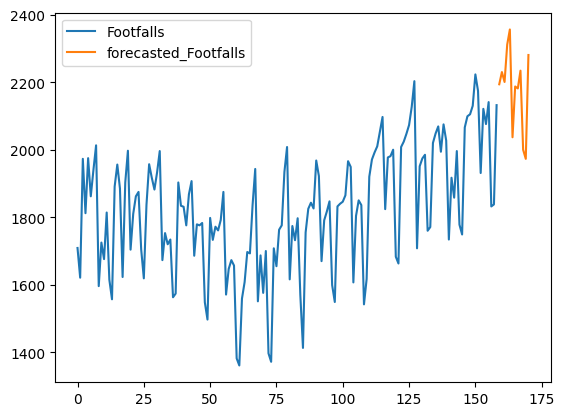

In [66]:
new_var[['Footfalls','forecasted_Footfalls']].reset_index(drop=True).plot()

<Axes: xlabel='year'>

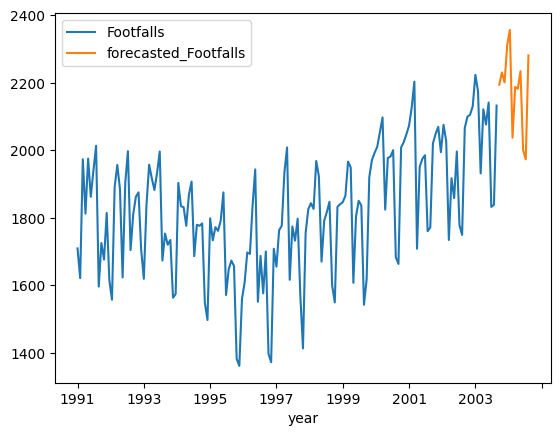

In [67]:
new_var['Date'] = pd.to_datetime(new_var['Date'])
new_var.set_index('year')[['Footfalls','forecasted_Footfalls']].plot()